In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [65]:
df.shape

(10000, 6)

In [66]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [68]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [69]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [70]:
df.duplicated().sum()

127

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.shape

(9873, 6)

In [73]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_data = ohe.fit_transform(df[['Extracurricular Activities']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Extracurricular Activities']))
df = pd.concat([df, encoded_df], axis=1)
df.drop('Extracurricular Activities', axis=1, inplace=True)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7.0,99.0,9.0,1.0,91.0,0.0,1.0
1,4.0,82.0,4.0,2.0,65.0,1.0,0.0
2,8.0,51.0,7.0,2.0,45.0,0.0,1.0
3,5.0,52.0,5.0,2.0,36.0,0.0,1.0
4,7.0,75.0,8.0,5.0,66.0,1.0,0.0


In [74]:
df['Performance Index'].unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.,  nan])

In [75]:
from operator import gt
gte_90 = len(df[df['Performance Index'] >= 90])
gte_80_lt_90 = len(df[(df['Performance Index'] < 90) & (df['Performance Index'] >= 80)])
gte_70_lt_80 = len(df[(df['Performance Index'] < 80) & (df['Performance Index'] >= 70)])
gte_60_lt_70 = len(df[(df['Performance Index'] < 70) & (df['Performance Index'] >= 60)])
lt_60 = len(df[df['Performance Index'] < 60])

print('# of students with a Performance Index >= 90:\t', gte_90)
print('# of students with a Performance Index >= 80 and < 90:\t', gte_80_lt_90)
print('# of students with a Performance Index >=70 and < 80:\t', gte_70_lt_80)
print('# of students with a Performance Index >= 60 and < 70:\t', gte_60_lt_70)
print('# of students with a Performance Index < 60:\t', lt_60)

# of students with a Performance Index >= 90:	 265
# of students with a Performance Index >= 80 and < 90:	 900
# of students with a Performance Index >=70 and < 80:	 1452
# of students with a Performance Index >= 60 and < 70:	 1617
# of students with a Performance Index < 60:	 5639


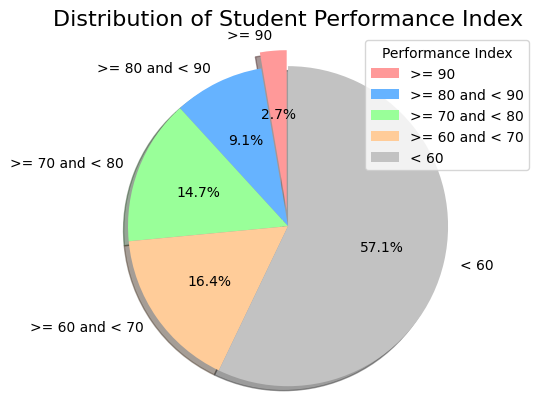

In [76]:
import matplotlib.pyplot as plt

labels = ['>= 90', '>= 80 and < 90', '>= 70 and < 80', '>= 60 and < 70', '< 60']
sizes = [gte_90, gte_80_lt_90, gte_70_lt_80, gte_60_lt_70, lt_60]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2c2']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Student Performance Index', fontsize=16)
plt.axis('equal')
plt.legend(title="Performance Index", loc="best")
plt.show()

In [77]:
conditions = [
    (df['Performance Index'] >= 90),
    (df['Performance Index'] >= 80) & (df['Performance Index'] < 90),
    (df['Performance Index'] >= 70) & (df['Performance Index'] < 80),
    (df['Performance Index'] >= 60) & (df['Performance Index'] < 70),
    (df['Performance Index'] < 60)
]

evaluations = ['Excellent', 'Great', 'Good', 'Sufficient', 'Insufficient']
df['Performance Evaluation'] = np.select(conditions, evaluations)

df.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes,Performance Evaluation
0,7.0,99.0,9.0,1.0,91.0,0.0,1.0,Excellent
1,4.0,82.0,4.0,2.0,65.0,1.0,0.0,Sufficient
2,8.0,51.0,7.0,2.0,45.0,0.0,1.0,Insufficient
3,5.0,52.0,5.0,2.0,36.0,0.0,1.0,Insufficient
4,7.0,75.0,8.0,5.0,66.0,1.0,0.0,Sufficient


<Axes: >

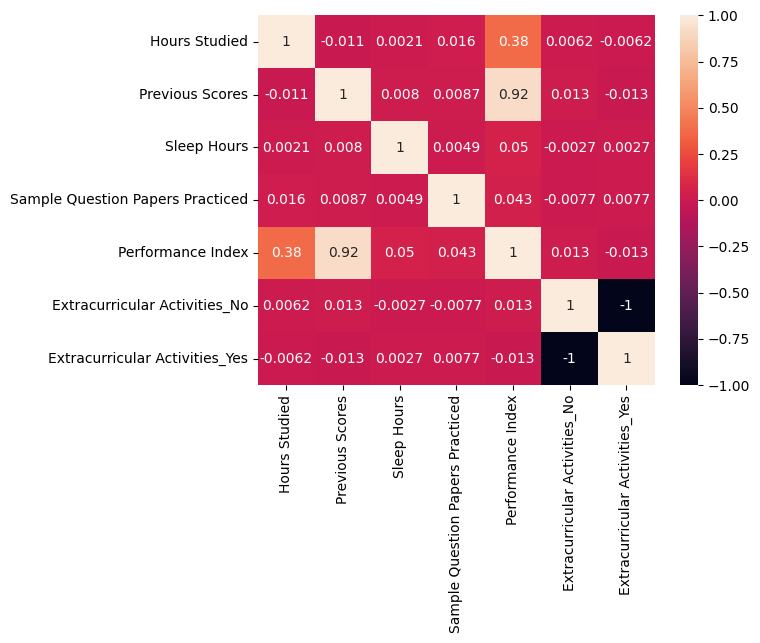

In [78]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Hours Studied', ylabel='Count'>

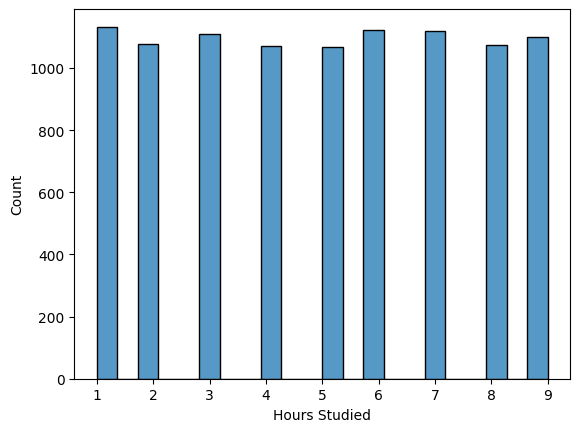

In [79]:
sns.histplot(df['Hours Studied'])

<Axes: xlabel='Hours Studied'>

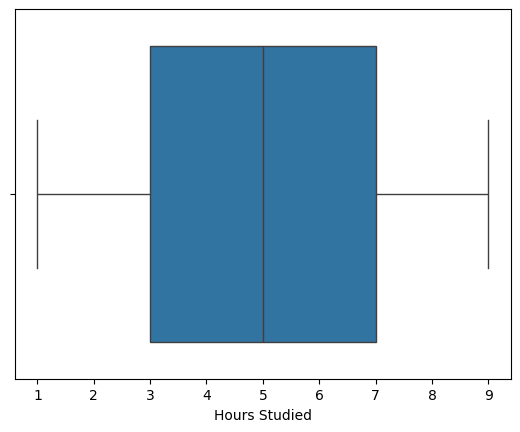

In [80]:
sns.boxplot(x=df['Hours Studied'])

<Axes: xlabel='Previous Scores', ylabel='Count'>

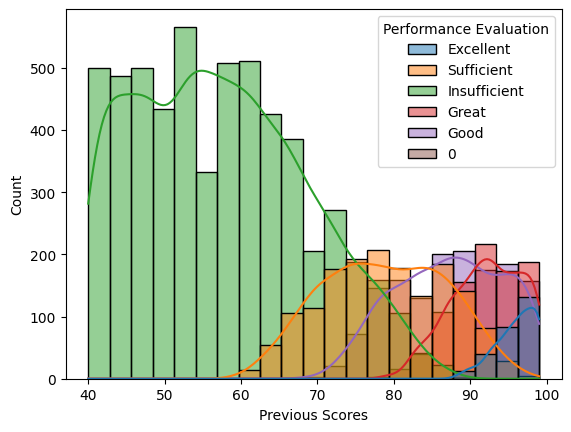

In [81]:
sns.histplot(data = df, x = df['Previous Scores'], kde = True, hue='Performance Evaluation')

<Axes: xlabel='Hours Studied', ylabel='Count'>

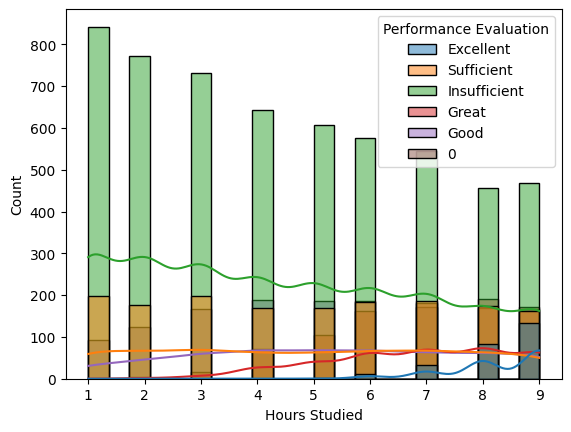

In [82]:
sns.histplot(data = df, x = df['Hours Studied'], kde = True, hue='Performance Evaluation')

In [83]:
X = df[['Previous Scores','Hours Studied']]
y = df['Performance Index']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

imputer_y = SimpleImputer(strategy='mean')

y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = imputer_y.transform(y_test.values.reshape(-1, 1))

y_train = y_train.ravel()
y_test = y_test.ravel()

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [86]:
for p, r in zip(y_pred, y_test):
    print(f"Predicted: {round(p,2)}, Actual: {r}")

Predicted: 84.97, Actual: 86.0
Predicted: 24.41, Actual: 27.0
Predicted: 91.91, Actual: 91.0
Predicted: 51.51, Actual: 52.0
Predicted: 66.82, Actual: 66.0
Predicted: 54.59, Actual: 53.0
Predicted: 47.45, Actual: 48.0
Predicted: 77.64, Actual: 80.0
Predicted: 76.82, Actual: 77.0
Predicted: 70.7, Actual: 73.0
Predicted: 22.57, Actual: 19.0
Predicted: 57.63, Actual: 59.0
Predicted: 74.16, Actual: 73.0
Predicted: 49.29, Actual: 53.0
Predicted: 35.62, Actual: 37.0
Predicted: 29.7, Actual: 27.0
Predicted: 57.63, Actual: 63.0
Predicted: 68.24, Actual: 74.0
Predicted: 80.28, Actual: 81.0
Predicted: 77.22, Actual: 80.0
Predicted: 30.94, Actual: 30.0
Predicted: 75.8, Actual: 75.0
Predicted: 43.78, Actual: 44.0
Predicted: 72.92, Actual: 74.0
Predicted: 66.82, Actual: 71.0
Predicted: 60.69, Actual: 62.0
Predicted: 46.43, Actual: 47.0
Predicted: 23.39, Actual: 25.0
Predicted: 39.9, Actual: 40.0
Predicted: 72.54, Actual: 68.0
Predicted: 61.53, Actual: 60.0
Predicted: 57.05, Actual: 58.0
Predicted: 5

In [87]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 5.504412374417972
Mean Absolute Error: 1.8534674817577155
R-squared: 0.9850799251411154
Coefficients: [1.01946409 2.85861123]
Intercept: -29.84613910768922


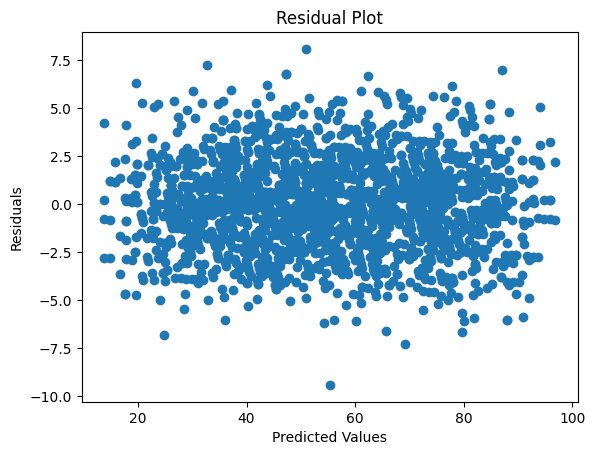

In [88]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()